<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Statistics (b)

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')

In [2]:
# pip install fix_yahoo_finance --upgrade --no-cache-dir

## Principal Component Analysis

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
from sklearn.decomposition import KernelPCA

In [5]:
pd.__version__

'0.20.2'

### DAX Index and its 30 Stocks

In [6]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [7]:
%%time
data = pd.DataFrame()
for sym in symbols:
    # only retrieves data from mid 2016 on
    data[sym] = pdr.get_data_yahoo(sym, data_source='yahoo', start='2016-1-1')['Adj Close']
data = data.dropna()
print('')

[*********************100%***********************]  1 of 1 downloaded
CPU times: user 1.26 s, sys: 77.2 ms, total: 1.33 s
Wall time: 7.81 s


In [8]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [9]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2016-08-03,147.899994,127.349998,69.000000,94.370003,85.000000,75.809998
2016-08-22,153.899994,129.250000,71.510002,95.889999,83.230003,76.949997
2016-08-23,153.949997,130.899994,72.500000,96.669998,83.419998,77.480003
2016-08-24,153.050003,130.449997,73.019997,96.720001,83.410004,77.510002
2016-08-25,152.100006,129.399994,72.449997,96.040001,83.480003,76.220001


### Applying PCA

In [10]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [11]:
pca = KernelPCA().fit(data.apply(scale_function))

In [12]:
len(pca.lambdas_)

117

In [13]:
pca.lambdas_[:10].round()

array([ 4196.,  1096.,   244.,   210.,   128.,    95.,    68.,    54.,
          47.,    32.])

In [14]:
get_we = lambda x: x / x.sum()

In [15]:
get_we(pca.lambdas_)[:10]

array([ 0.66284022,  0.17321784,  0.03861128,  0.03319141,  0.02022036,
        0.01507081,  0.01067991,  0.00853324,  0.00748737,  0.00509048])

In [16]:
get_we(pca.lambdas_)[:5].sum()

0.92808111913492708

### Constructing a PCA Index

In [19]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

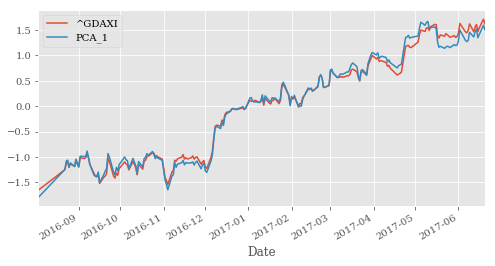

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_1
# title: German DAX index and PCA index with 1 component

In [24]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

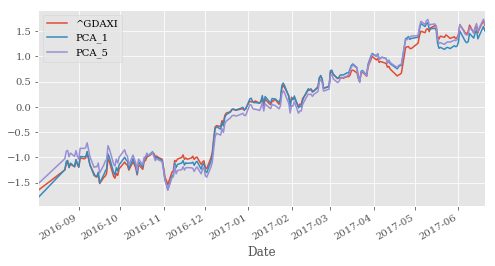

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 5 components

In [26]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 736179.,  736198.,  736199.,  736200.,  736201.,  736202.,
        736205.,  736206.,  736207.,  736208.,  736209.,  736212.,
        736213.,  736214.,  736215.,  736216.,  736219.,  736220.,
        736221.,  736222.,  736223.,  736226.,  736227.,  736228.,
        736229.,  736230.,  736233.,  736234.,  736235.,  736236.,
        736237.,  736241.,  736242.,  736243.,  736244.,  736247.,
        736248.,  736249.,  736250.,  736251.,  736254.,  736255.,
        736256.,  736257.,  736258.,  736261.,  736262.,  736263.,
        736264.,  736265.,  736268.,  736269.,  736270.,  736271.,
        736272.,  736275.,  736276.,  736277.,  736278.,  736279.,
        736282.,  736283.,  736284.,  736285.,  736286.,  736289.,
        736290.,  736291.,  736292.,  736293.,  736296.,  736297.,
        736298.,  736299.,  736300.,  736303.,  736304.,  736305.,
        736306.,  736307.,  736310.,  736311.,  736312.,  736313.,
        736314.,  736317.,  736318.,  736319.,  736320.,  7363

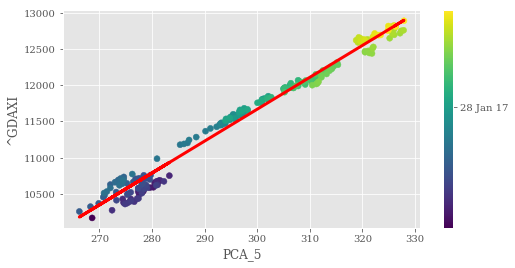

In [27]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_3
# title: DAX return values against PCA return values with linear regression

In [28]:
cut_date = '2017-3-1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

In [29]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

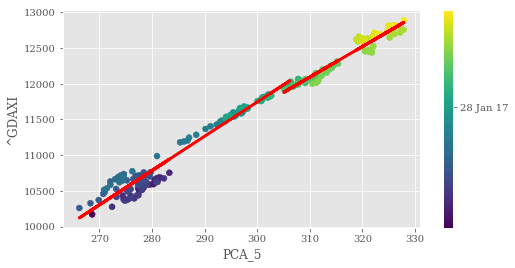

In [30]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_7
# title: DAX index values against PCA index values with early and late regression (regime switch)

## Bayesian Regression

### Bayes' Formula

### PyMC3

In [32]:
import warnings
warnings.simplefilter('ignore')
import pymc3 as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

### Introductory Example

In [33]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [34]:
reg = np.polyfit(x, y, 1)
  # linear regression

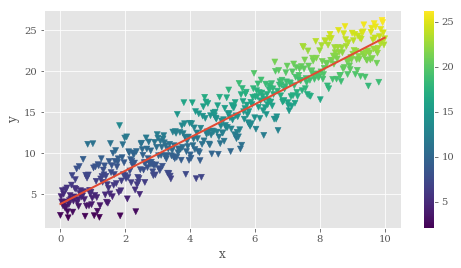

In [35]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
# tag: pm_fig_0
# title: Sample data points a regresion line
# size: 90

In [36]:
reg

array([ 2.03384161,  3.77649234])

In [37]:
with pm.Model() as model: 
        # model specifications in PyMC3
        # are wrapped in a with-statement
    # define priors
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # define linear regression
    y_est = alpha + beta * x
    
    # define likelihood
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    start = pm.find_MAP()
      # find starting value by optimization
    step = pm.NUTS(state=start)
      # instantiate MCMC sampling algorithm
    trace = pm.sample(100, step, start=start, progressbar=False)
      # draw 100 posterior samples using NUTS sampling

Optimization terminated successfully.
         Current function value: 1065.968801
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


In [38]:
trace[0]

{'alpha': 3.9240065171325469,
 'beta': 2.0242759725163029,
 'sigma': 2.0071601413413473,
 'sigma_interval_': -1.3818252652129002}

In [41]:
# fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
# plt.figure(figsize=(8, 8))
# tag: pm_fig_1
# title: Trace plots for alpha, beta and sigma
# size: 90

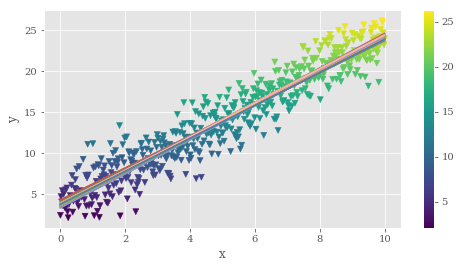

In [42]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)
# tag: pm_fig_2
# title: Sample data and regression lines from Bayesian regression
# size: 90

### Real Data

In [43]:
import warnings
warnings.simplefilter('ignore')
import pytz
import datetime as dt

In [45]:
data = pd.DataFrame()
symbols = ['GLD', 'GDX']
for sym in symbols:
    data[sym] = pdr.DataReader(sym, data_source='google')['Close']

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1892 entries, 2010-01-04 to 2017-07-10
Data columns (total 2 columns):
GLD    1892 non-null float64
GDX    1892 non-null float64
dtypes: float64(2)
memory usage: 44.3 KB


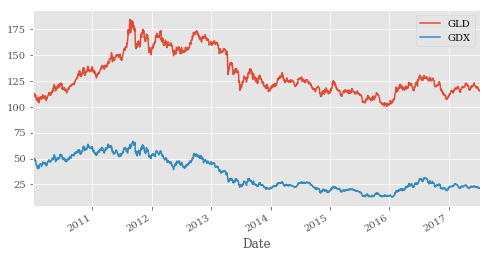

In [47]:
data.plot(figsize=(8, 4))
# tag: zip_fig_1
# title: Co-movements of traiding pair
# size: 90

In [48]:
data.ix[-1] / data.ix[0] - 1

GLD    0.051639
GDX   -0.549151
dtype: float64

In [49]:
data.corr()

,GLD,GDX
GLD,1.000000,0.712527
GDX,0.712527,1.000000


In [50]:
data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-03', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10'],
              dtype='datetime64[ns]', name='Date', length=1892, freq=None)

In [51]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 733776.,  733777.,  733778., ...,  736516.,  736517.,  736520.])

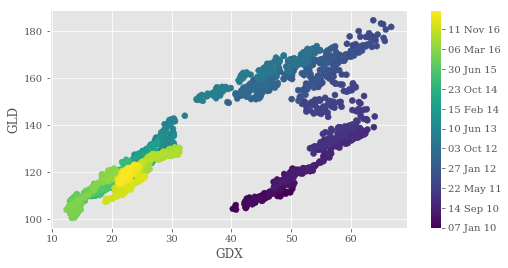

In [52]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_2
# title: Scatter plot of prices for GLD and GDX
# size: 90

In [53]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['GDX'].values
    
    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma,
                           observed=data['GLD'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(100, step, start=start, progressbar=False)

Optimization terminated successfully.
         Current function value: 7681.746365
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


In [55]:
# fig = pm.traceplot(trace)
# plt.figure(figsize=(8, 8))
# tag: zip_fig_3
# title: Trace plots for alpha, beta and sigma based on GDX and GLD data
# size: 90

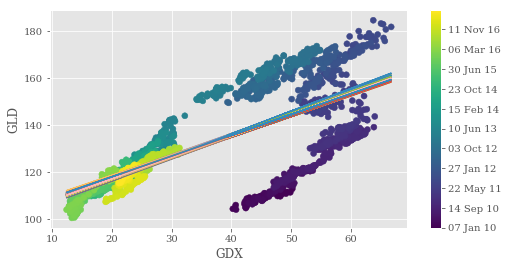

In [56]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_4
# title: Scatter plot with "simple" regression lines
# size: 90

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>